# Decision Tree Classifier



In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [8]:
from notebooks.utils.classification_metrics import classification

In [3]:
train =  pd.read_parquet('../../../data/model_input/train_sets/breast_cancer.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/breast_cancer.parquet')

In [4]:
y_train = train.diagnosis
X_train = train.drop(columns=['diagnosis'])

In [5]:
y_validation = validation.diagnosis
X_validation = validation.drop(columns=['diagnosis'])

We are fitting our trees varying only their maximum depth.

In [6]:
models_list = [DecisionTreeClassifier(max_depth = i) for i in range(1, 11)]
names_list = ['DT_'+str(i) for i in range(1, 11)]

In [9]:
metrics = classification(models_list, names_list, '../../../data/metrics/breast_cancer/decision_tree.csv', X_train, y_train, X_validation, y_validation)
metrics

,Run_Time,Train_AUC,Validation_AUC,delta%
DT_1,0.019948,0.926936,0.937657,1.156541
DT_2,0.012963,0.976105,0.937030,-4.003100
DT_3,0.013963,0.990346,0.933271,-5.763125
DT_4,0.012965,0.999572,0.893170,-10.644722
DT_5,0.015957,1.000000,0.893170,-10.682957
DT_6,0.015958,1.000000,0.893170,-10.682957
DT_7,0.015958,1.000000,0.893170,-10.682957
DT_8,0.012676,1.000000,0.893170,-10.682957
DT_9,0.015957,1.000000,0.893170,-10.682957
DT_10,0.012966,1.000000,0.893170,-10.682957


These models tend to be overfitted, the best ones are the first 3 trees (maximum depths 1, 2 and 3) because in terms of accuracy are not bad at all and their delta is lower than 10%, in fact, the tree of depth 1 had performed better in the validation than in the train.

Trees of maximum depth 4 and above are way overfitted. Also the one with maximum depth 3 is a bit overfitted if we fix a bound of delta at 5%. We choose **DT_2** as the best model because, surprisingly, we got the highest AUC in validation. Actually the highest AUC is achieved by DT_1 but it is not very reliable that it works better with only one partition. 

Let's splot it:

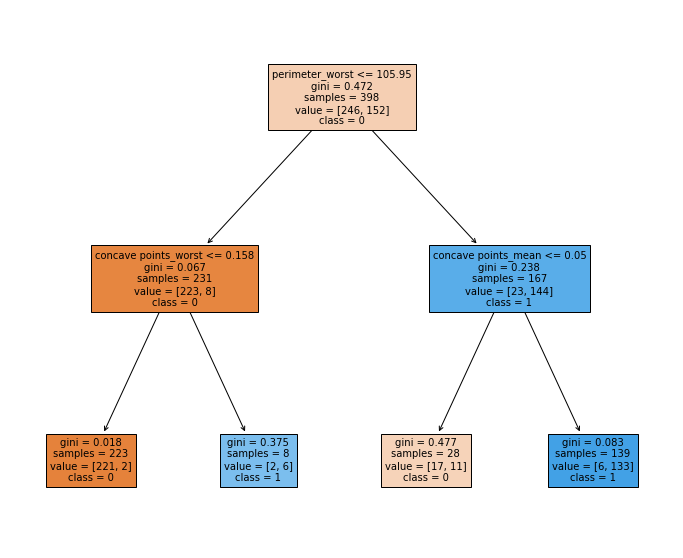

In [35]:
plt.figure(figsize=(12, 10))
plot_tree(models_list[1], filled=True, feature_names=X_train.columns, class_names=['0', '1'])
plt.show()

In [28]:
test = pd.read_parquet('../../../data/model_input/test_sets/breast_cancer.parquet')

In [29]:
y_test = test.diagnosis
X_test = test.drop(columns=['diagnosis'])

In [30]:
retrain = pd.concat([train, validation])

In [31]:
y_retrain = retrain.diagnosis
X_retrain = retrain.drop(columns=['diagnosis'])

In [41]:
model = DecisionTreeClassifier(max_depth=2).fit(X_retrain, y_retrain)

In [42]:
test_pred = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, test_pred)
print('Test AUC:', round(auc, 4))

Test AUC: 0.9366


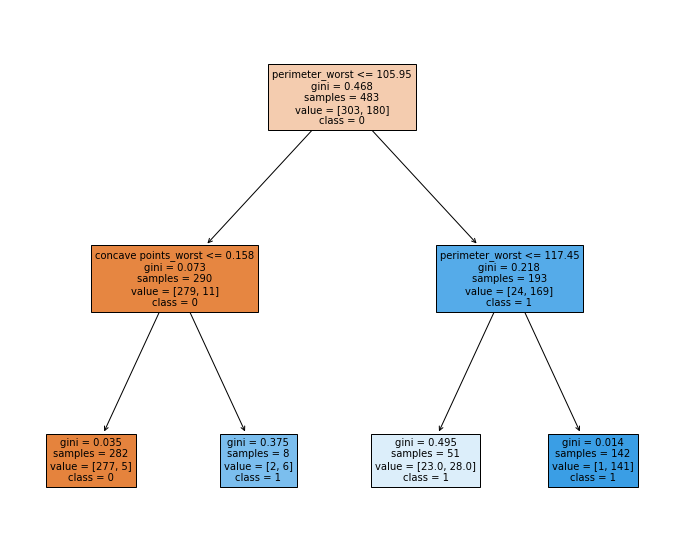

In [38]:
plt.figure(figsize=(12, 10))
plot_tree(model, filled=True, feature_names=X_retrain.columns, class_names=['0', '1'])
plt.show()

With the new training there is a node that has changed, but the performance is as expected: pretty good.

In [43]:
dump(model, 'best_decision_tree.joblib')

['best_decision_tree.joblib']

In [44]:
with open('../../../data/metrics/breast_cancer/final_AUC.txt', 'a') as f:
    f.write('\nDT, '+ str(auc))